In [1]:
'''#Importing Cython for performance optimization
!/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install cython

%load_ext Cython'''
'''%%cython
#=======================Metropolis-Hastings Algorithm (Cython)========================

import numpy as np
cimport numpy as np
from libc.stdlib cimport rand, RAND_MAX
from libc.math cimport fmin
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

def metropolis_cython(int N, double x0, double step_size, int burnin, int thinning):
    cdef int total_steps = N * thinning + burnin
    cdef np.ndarray[np.double_t, ndim=1] samples = np.empty(N, dtype=np.double)
    cdef double x = x0
    cdef int i, count = 0
    cdef double x_cand, alpha, u

    for i in range(total_steps):
        x_cand = x + step_size * (rng.uniform(-step_size, step_size))
        alpha = fmin(1.0, (1.0 / (1.0 + x_cand * x_cand)) / (1.0 / (1.0 + x * x)))
        u = rand() / <double>RAND_MAX
        if u < alpha:
            x = x_cand
        if i >= burnin and (i - burnin) % thinning == 0:
            samples[count] = x
            count += 1
    samples.sort()
    return samples'''

'%%cython\n#=======================Metropolis-Hastings Algorithm (Cython)========================\n\nimport numpy as np\ncimport numpy as np\nfrom libc.stdlib cimport rand, RAND_MAX\nfrom libc.math cimport fmin\ncimport cython\n\n@cython.boundscheck(False)\n@cython.wraparound(False)\n\ndef metropolis_cython(int N, double x0, double step_size, int burnin, int thinning):\n    cdef int total_steps = N * thinning + burnin\n    cdef np.ndarray[np.double_t, ndim=1] samples = np.empty(N, dtype=np.double)\n    cdef double x = x0\n    cdef int i, count = 0\n    cdef double x_cand, alpha, u\n\n    for i in range(total_steps):\n        x_cand = x + step_size * (rng.uniform(-step_size, step_size))\n        alpha = fmin(1.0, (1.0 / (1.0 + x_cand * x_cand)) / (1.0 / (1.0 + x * x)))\n        u = rand() / <double>RAND_MAX\n        if u < alpha:\n            x = x_cand\n        if i >= burnin and (i - burnin) % thinning == 0:\n            samples[count] = x\n            count += 1\n    samples.sort()\n

In [2]:
'''# Generate a random variable from a Beta(alpha, beta_param) distribution on [a, b]
def rng_beta(alpha, beta_param, a, b):
    x = np.random.beta(alpha, beta_param)  
    y = a + (b - a) * x
    return y
    
# PDF of a Beta distribution on interval [a, b]
def beta_pdf_on_interval(x, alpha, beta_param, a, b):
    """
    Compute the PDF of a Beta(alpha, beta_param) distribution on [a, b] at x.
    """
    # Transform x to [0, 1]
    y = (x - a) / (b - a)
    pdf = beta.pdf(y, alpha, beta_param) / (b - a)
    # Set pdf to 0 outside [a, b]
    pdf = np.where((x >= a) & (x <= b), pdf, 0)
    return pdf'''

'# Generate a random variable from a Beta(alpha, beta_param) distribution on [a, b]\ndef rng_beta(alpha, beta_param, a, b):\n    x = np.random.beta(alpha, beta_param)  \n    y = a + (b - a) * x\n    return y\n    \n# PDF of a Beta distribution on interval [a, b]\ndef beta_pdf_on_interval(x, alpha, beta_param, a, b):\n    """\n    Compute the PDF of a Beta(alpha, beta_param) distribution on [a, b] at x.\n    """\n    # Transform x to [0, 1]\n    y = (x - a) / (b - a)\n    pdf = beta.pdf(y, alpha, beta_param) / (b - a)\n    # Set pdf to 0 outside [a, b]\n    pdf = np.where((x >= a) & (x <= b), pdf, 0)\n    return pdf'

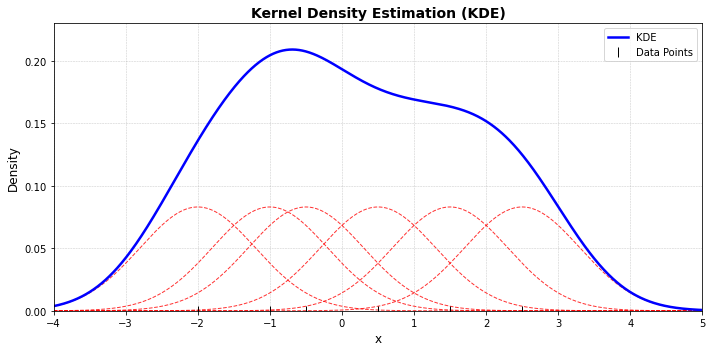

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --------------------------------------
# 1. Sample data points
# --------------------------------------
data = np.array([-2, -1, -0.5, 0.5, 1.5, 2.5])

# --------------------------------------
# 2. Evaluation range for KDE
# --------------------------------------
x = np.linspace(-4, 5, 1000)

# --------------------------------------
# 3. Bandwidth (controls smoothing)
# --------------------------------------
h = 0.8

# --------------------------------------
# 4. Compute individual Gaussian kernels
# --------------------------------------
kernels = [norm(loc=xi, scale=h).pdf(x) for xi in data]

# --------------------------------------
# 5. KDE = average of the kernels
# --------------------------------------
kde = np.mean(kernels, axis=0)

# --------------------------------------
# 6. Plotting
# --------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Kernel Density Estimation (KDE)", fontsize=14, fontweight='bold')

# Plot individual normalized kernels
for kernel in kernels:
    ax.plot(x, kernel/len(data), 'r--', linewidth=1, alpha=0.8)

# Plot final KDE curve
ax.plot(x, kde, 'b-', linewidth=2.5, label='KDE')

# Plot data points as black vertical ticks
ax.plot(data, np.zeros_like(data), 'k|', markersize=10, label='Data Points')

# --------------------------------------
# 7. Axis labels and grid
# --------------------------------------
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlim(-4, 5)
ax.set_ylim(0, max(kde)*1.1)


# --------------------------------------
# 8. Display
# --------------------------------------
plt.tight_layout()
plt.savefig("Plots/Kernel_Density_Estimation_(KDE).pdf", format="pdf")
plt.show()
